In [4]:
# Imports

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt
import cv2
import os

import numpy as np

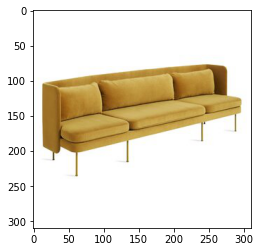

In [6]:
img = image.load_img('images/wayfair/large_batch/train/sofa/ABFR1057.png')
plt.imshow(img)

In [7]:
cv2.imread('images/wayfair/large_batch/train/sofa/ABFR1057.png').shape

(310, 310, 3)

In [8]:
cv2.imread('images/wayfair/large_batch/train/sofa/ABFR1057.png')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [19]:
# deviding into different folders
#put all the images in small_batch in each class folder, and after splitting delete them!
import splitfolders
splitfolders.ratio('images/wayfair/small_batch', output="chair_output", seed=1337, ratio=(.8, 0.1,0.1)) 


Copying files: 0 files [00:00, ? files/s]


In [20]:

train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale= 1/255)

train_dataset = train.flow_from_directory('images/wayfair/small_batch/train', 
                                          target_size= (200,200), # input shape
                                         batch_size = 10,
                                         class_mode= 'binary')

Found 253 images belonging to 2 classes.


In [21]:
val_dataset = train.flow_from_directory('images/wayfair/small_batch/val', 
                                          target_size= (200,200),
                                         batch_size = 10,
                                         class_mode= 'binary')

Found 31 images belonging to 2 classes.


In [22]:
train_dataset.class_indices

{'chair': 0, 'sofa': 1}

In [23]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [24]:
model = tf.keras.models.Sequential(
    [tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200, 200,3)),
     tf.keras.layers.MaxPool2D(2,2), 
     tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
     tf.keras.layers.MaxPool2D(2,2),
     tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
     tf.keras.layers.MaxPool2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation= 'relu'),
     tf.keras.layers.Dense(1, activation= 'sigmoid') # only for binary
    ])

In [26]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),# or adam
              metrics = ['accuracy'])

In [29]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 30,  # you can add call backs too to stop when you reach a certain accuracy
                                   # add epochs to learn more and have better accuracy
                     validation_data= val_dataset)

Epoch 1/30
3/3 [==============================] - 3s 931ms/step - loss: 0.5558 - accuracy: 0.7826 - val_loss: 2.5479 - val_accuracy: 0.5806
Epoch 2/30
3/3 [==============================] - 2s 841ms/step - loss: 0.7459 - accuracy: 0.8333 - val_loss: 0.5573 - val_accuracy: 0.6774
Epoch 3/30
3/3 [==============================] - 3s 974ms/step - loss: 0.4248 - accuracy: 0.8000 - val_loss: 0.5897 - val_accuracy: 0.6129
Epoch 4/30
3/3 [==============================] - 2s 766ms/step - loss: 0.6268 - accuracy: 0.7000 - val_loss: 0.5108 - val_accuracy: 0.7097
Epoch 5/30
3/3 [==============================] - 2s 796ms/step - loss: 0.3211 - accuracy: 0.9667 - val_loss: 0.4277 - val_accuracy: 0.8387
Epoch 6/30
3/3 [==============================] - 2s 854ms/step - loss: 0.4466 - accuracy: 0.8696 - val_loss: 0.4768 - val_accuracy: 0.8065
Epoch 7/30
3/3 [==============================] - 2s 782ms/step - loss: 0.3495 - accuracy: 0.8667 - val_loss: 0.4159 - val_accuracy: 0.7419
Epoch 8/30
3/3 [====

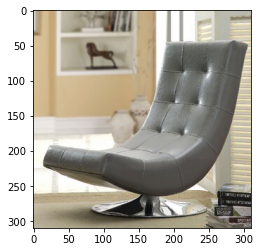

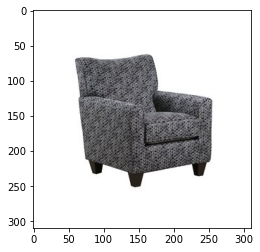

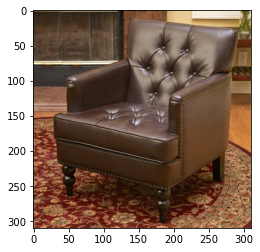

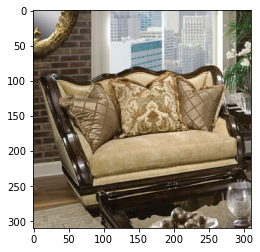

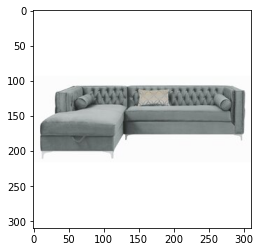

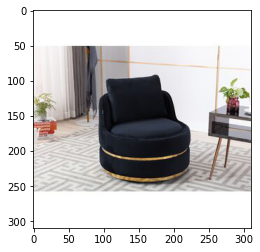

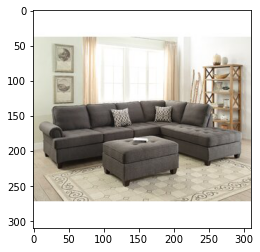

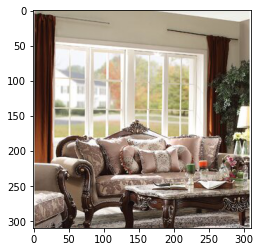

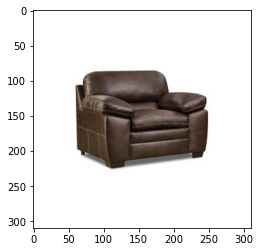

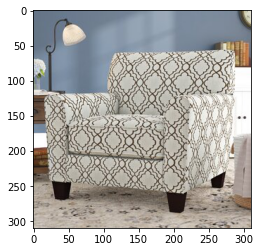

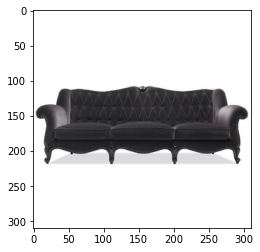

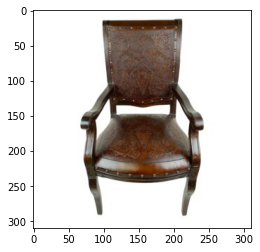

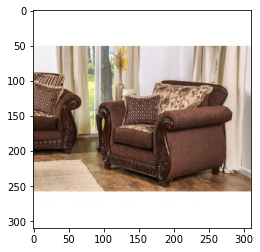

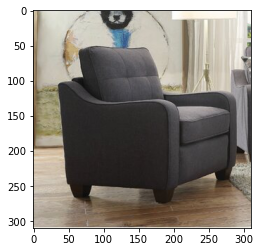

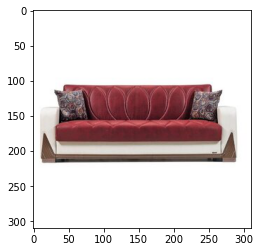

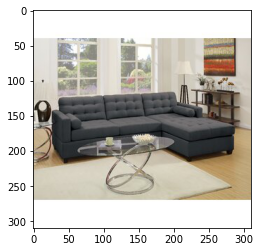

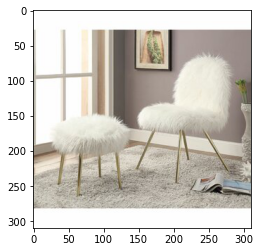

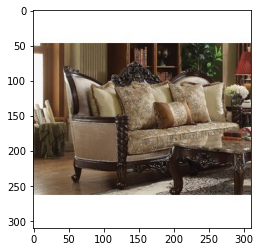

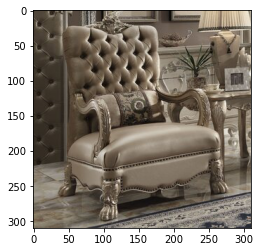

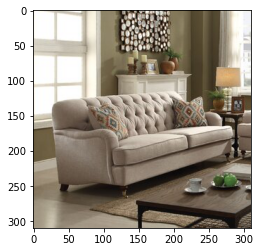

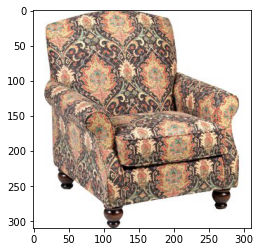

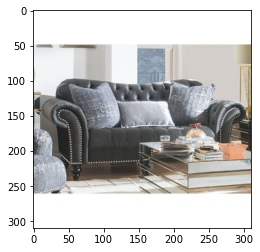

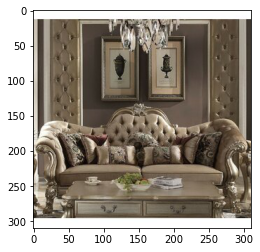

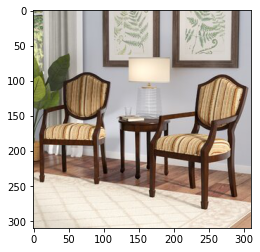

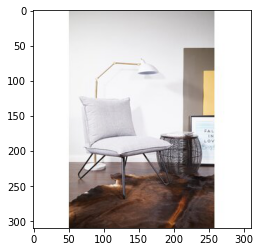

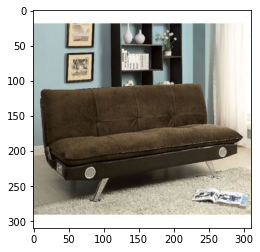

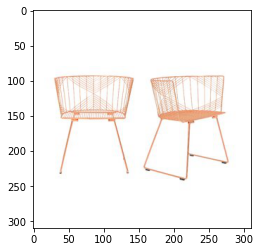

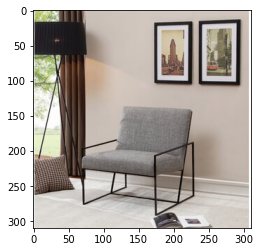

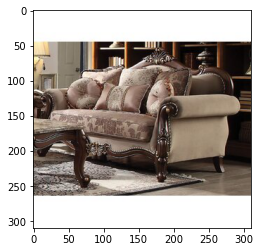

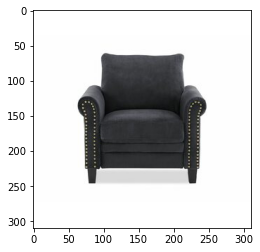

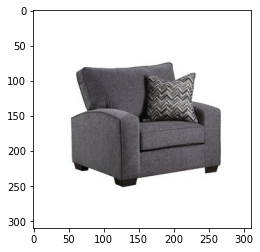

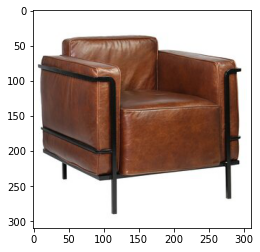

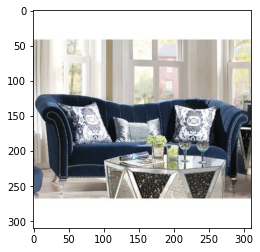

In [33]:
test_path = 'images/wayfair/small_batch/test'

for i in os.listdir(test_path):
    try:
        img = image.load_img(test_path + '/'+i)
        plt.imshow(img)
        plt.show()
    except:
        continue